In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [2]:
bank=pd.read_csv("bank.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
# 각 컬럼별 널의 개수 출력
bank.isnull().sum()
bank.describe() # 기술통계
x=bank.columns

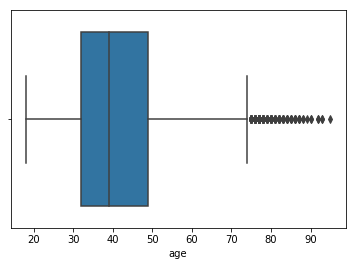

In [4]:
sns.boxplot(x=bank['age'])

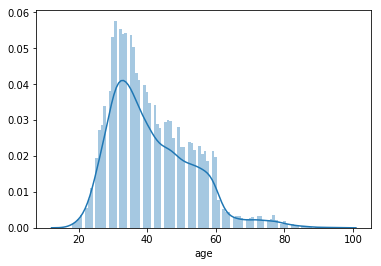

In [5]:
sns.distplot(bank.age, bins=100)

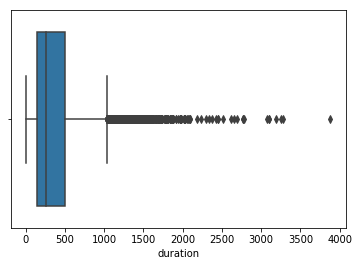

In [6]:
sns.boxplot(x=bank.duration)

In [7]:
bankData=bank.copy()

In [8]:
bankData.info()
bankData.columns
bankData.job

# management

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


0             admin.
1             admin.
2         technician
3           services
4             admin.
            ...     
11157    blue-collar
11158       services
11159     technician
11160     technician
11161     technician
Name: job, Length: 11162, dtype: object

In [9]:
bankData.groupby(['job']).count()
bankData.job.value_counts()

# deposit이 yes인 데이터에 한해서 개수를 출력

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [10]:
bankData[bankData.deposit=='yes']
bankData[bankData['job']=='admin.'][bankData['deposit']=='yes']
bankData[bankData.deposit=='yes'].groupby('job').size()

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


job
admin.            631
blue-collar       708
entrepreneur      123
housemaid         109
management       1301
retired           516
self-employed     187
services          369
student           269
technician        840
unemployed        202
unknown            34
dtype: int64

In [11]:
jobs=list(set(bankData.job.values))
for j in jobs:
    print("{:15} : {:5}".format(j,len(bankData[(bankData.deposit=='yes') & (bankData.job==j)])))

services        :   369
management      :  1301
self-employed   :   187
unemployed      :   202
admin.          :   631
entrepreneur    :   123
unknown         :    34
housemaid       :   109
retired         :   516
technician      :   840
blue-collar     :   708
student         :   269


In [12]:
jobs
# management, admin => white-collar
# services, housemid => pink-collar
# retired, student, unemployed, unknown => other
bankData.job=bankData.job.replace(['management','admin.'],'white-collar')
bankData.job=bankData.job.replace(['services','housemaid'],'pink-collar')
bankData.job=bankData.job.replace(['retired','student','unemployed','unknown'],'other')


In [13]:
bankData.job.value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

In [14]:
bankData.poutcome

0        unknown
1        unknown
2        unknown
3        unknown
4        unknown
          ...   
11157    unknown
11158    unknown
11159    unknown
11160    failure
11161    unknown
Name: poutcome, Length: 11162, dtype: object

In [15]:
bankData['poutcome']=bankData['poutcome'].replace(['other'],'unknown')

In [16]:
bankData['poutcome'].value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [17]:
bankData.drop('contact',axis=1, inplace=True)
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(9)
memory usage: 1.4+ MB


In [18]:
bankData['default'].value_counts()
# bankData['default_cat']=yes->1, no->0
# default 컬럼은 제거
bankData['default_cat']=bankData['default']

In [19]:
bankData['default_cat']=bankData['default_cat'].replace(['yes'],1)
bankData['default_cat']=bankData['default_cat'].replace(['no'],0)
bankData.drop('default', axis=1, inplace=True)

In [20]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
age            11162 non-null int64
job            11162 non-null object
marital        11162 non-null object
education      11162 non-null object
balance        11162 non-null int64
housing        11162 non-null object
loan           11162 non-null object
day            11162 non-null int64
month          11162 non-null object
duration       11162 non-null int64
campaign       11162 non-null int64
pdays          11162 non-null int64
previous       11162 non-null int64
poutcome       11162 non-null object
deposit        11162 non-null object
default_cat    11162 non-null int64
dtypes: int64(8), object(8)
memory usage: 1.4+ MB


In [21]:
bankData['defualt']=bank['default']

In [22]:
bankData['default_cat']=bankData['defualt'].map({'yes':1,'no':0})

In [23]:
bankData['default_cat'].value_counts()
bankData.drop('defualt', axis=1, inplace=True)

In [24]:
bankData['housing_cat']=bankData['housing'].map({'yes':1,'no':0})
bankData.drop('housing', axis=1, inplace=True)

In [25]:
bankData['loan_cat']=bankData['loan'].map({'yes':1,'no':0})
bankData.drop('loan', axis=1, inplace=True)

In [26]:
bankData.drop('day', axis=1, inplace=True)
bankData.drop('month', axis=1, inplace=True)

In [27]:
bankData['deposit_cat']=bankData['deposit'].map({'yes':1,'no':0})
bankData.drop('deposit',axis=1,inplace=True)

In [28]:
len(bankData[bankData['pdays']==-1]) # 8324명 컨택 x
bankData['pdays'].max()

854

In [29]:
bankData['pdays']=bankData['pdays'].replace(-1, 10000)
bankData['pdays'].value_counts()
# bankData['pdays']=np.where(bankData['pdays']==-1, 10000, bankData['pdays'])

10000    8324
92        106
182        89
91         84
181        81
         ... 
587         1
579         1
515         1
491         1
683         1
Name: pdays, Length: 472, dtype: int64

In [30]:
bankData['recent_pdays']=np.where(bankData['pdays'], 1/bankData['pdays'], 1/bankData['pdays'])

In [31]:
bankData.drop('pdays',axis=1,inplace=True)

In [32]:
bankData.tail()

,age,job,marital,education,balance,duration,campaign,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays
11157,33,blue-collar,single,primary,1,257,1,0,unknown,0,1,0,0,0.000100
11158,39,pink-collar,married,secondary,733,83,4,0,unknown,0,0,0,0,0.000100
11159,32,technician,single,secondary,29,156,2,0,unknown,0,0,0,0,0.000100
11160,43,technician,married,secondary,0,9,2,5,failure,0,0,1,0,0.005814
11161,34,technician,married,secondary,0,628,1,0,unknown,0,0,0,0,0.000100


In [33]:
bankWithDummies=pd.get_dummies(
    data=bankData, columns=['job','marital','education','poutcome'], 
    prefix=['job','marital','education','poutcome'])

In [34]:
bankWithDummies.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,0,0,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,0,0,0,0,1,0.0001,...,0,1,0,0,0,1,0,0,0,1


In [35]:
bankWithDummies.describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,0.832557,0.015051,0.473123,0.130801,0.473840,0.003124,...,0.115839,0.568984,0.315176,0.134385,0.490593,0.330496,0.044526,0.110016,0.095951,0.794033
std,11.913369,3225.413326,347.128386,2.722077,2.292007,0.121761,0.499299,0.337198,0.499338,0.030686,...,0.320047,0.495241,0.464607,0.341080,0.499934,0.470413,0.206270,0.312924,0.294537,0.404424
min,18.000000,-6847.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,550.000000,255.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,1708.000000,496.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.001919,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,63.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


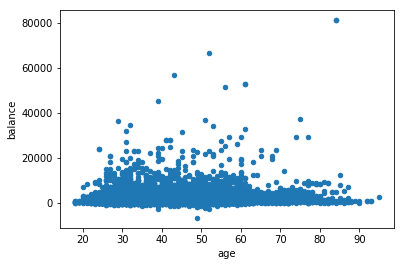

In [36]:
bankWithDummies.plot(kind='scatter', x='age', y='balance')

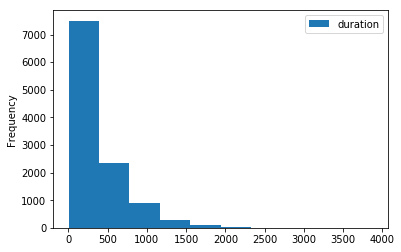

In [37]:
bankWithDummies.plot(kind='hist', x='poutcome_success', y='duration')

In [38]:
bankWithDummies[bankData.deposit_cat==1].describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000,...,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,537.294574,2.141047,1.170354,0.009832,0.365854,0.091511,1.0,0.004238,...,0.117603,0.520892,0.361505,0.111741,0.463226,0.377387,0.047646,0.116846,0.184912,0.698242
std,13.497781,3501.104777,392.525262,1.921826,2.553272,0.098676,0.481714,0.288361,0.0,0.035686,...,0.322167,0.499611,0.480482,0.315078,0.498693,0.484779,0.213036,0.321267,0.388263,0.459064
min,18.000000,-3058.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,210.000000,244.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,733.000000,426.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,50.000000,2159.000000,725.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.005128,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,32.000000,58.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
len(bankWithDummies[(bankData.deposit_cat==1) & (bankWithDummies.loan_cat) & (bankWithDummies.housing_cat)])


265

In [40]:
# deposit_cat이 1, default_cat 값이 1인 사람의 인원수 조사
len(bankWithDummies[(bankData.deposit_cat==1) & (bankData.default_cat==1)])
# 52명은 정기예금 가입, 채무불이행

52

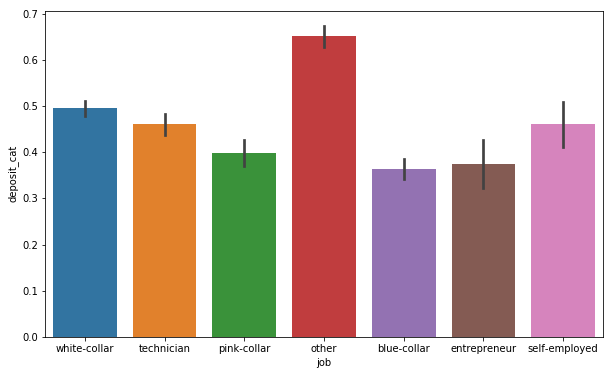

In [41]:
# 직업별 정기저축가입 비율
plt.figure(figsize=(10,6))
sns.barplot(x='job',y='deposit_cat',data=bankData)

In [42]:
bankwd=bankWithDummies

In [43]:
bankwd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 27 columns):
age                    11162 non-null int64
balance                11162 non-null int64
duration               11162 non-null int64
campaign               11162 non-null int64
previous               11162 non-null int64
default_cat            11162 non-null int64
housing_cat            11162 non-null int64
loan_cat               11162 non-null int64
deposit_cat            11162 non-null int64
recent_pdays           11162 non-null float64
job_blue-collar        11162 non-null uint8
job_entrepreneur       11162 non-null uint8
job_other              11162 non-null uint8
job_pink-collar        11162 non-null uint8
job_self-employed      11162 non-null uint8
job_technician         11162 non-null uint8
job_white-collar       11162 non-null uint8
marital_divorced       11162 non-null uint8
marital_married        11162 non-null uint8
marital_single         11162 non-null uint8
education

In [44]:
# 상관계수 구하기
corr=bankwd.corr()
corr

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
age,1.000000,0.112300,0.000189,-0.005278,0.020169,-0.011425,-0.168700,-0.031418,0.034901,0.019102,...,0.186349,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,0.062114,-0.038992
balance,0.112300,1.000000,0.022436,-0.013894,0.030805,-0.060954,-0.077092,-0.084589,0.081129,-0.004379,...,-0.017586,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,0.045603,-0.034524
duration,0.000189,0.022436,1.000000,-0.041557,-0.026716,-0.009760,0.035051,-0.001914,0.451919,-0.014868,...,0.021364,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,-0.022578,0.042725
campaign,-0.005278,-0.013894,-0.041557,1.000000,-0.049699,0.030975,0.006660,0.034722,-0.128081,-0.026296,...,-0.006828,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,-0.091807,0.128907
previous,0.020169,0.030805,-0.026716,-0.049699,1.000000,-0.035273,-0.000840,-0.022668,0.139867,0.122076,...,-0.026566,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,0.325477,-0.496921
default_cat,-0.011425,-0.060954,-0.009760,0.030975,-0.035273,1.000000,0.011076,0.076434,-0.040680,-0.011290,...,0.019633,-0.006819,-0.006255,0.013858,-0.000618,-0.011768,0.005421,-0.024650,-0.040272,0.048403
housing_cat,-0.168700,-0.077092,0.035051,0.006660,-0.000840,0.011076,1.000000,0.076761,-0.203888,-0.029350,...,0.007430,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,-0.136299,0.031375
loan_cat,-0.031418,-0.084589,-0.001914,0.034722,-0.022668,0.076434,0.076761,1.000000,-0.110580,-0.012697,...,0.026463,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,-0.080370,0.053686
deposit_cat,0.034901,0.081129,0.451919,-0.128081,0.139867,-0.040680,-0.203888,-0.110580,1.000000,0.034457,...,0.005228,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,0.286642,-0.224785
recent_pdays,0.019102,-0.004379,-0.014868,-0.026296,0.122076,-0.011290,-0.029350,-0.012697,0.034457,1.000000,...,-0.020253,0.009583,0.003736,-0.007034,-0.017129,0.017346,0.013590,0.051422,0.119598,-0.126890


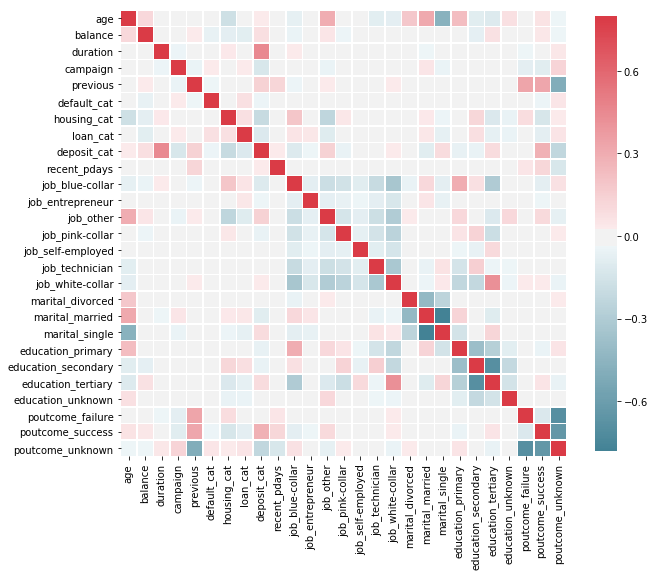

In [45]:
plt.figure(figsize=(10,10))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr, cmap=cmap, linewidths=.5, square=True, center=0, vmax=.8, cbar_kws={"shrink":.80})

In [46]:
corr_deposit=pd.DataFrame(corr['deposit_cat'].drop('deposit_cat'))

In [47]:
# corr_deposit에서 deposit_cat 기준으로 내림차순으로 소트 출력
corr_deposit.sort_values(by='deposit_cat', ascending=False)

,deposit_cat
duration,0.451919
poutcome_success,0.286642
job_other,0.144408
previous,0.139867
marital_single,0.094632
education_tertiary,0.094598
balance,0.081129
age,0.034901
recent_pdays,0.034457
job_white-collar,0.031621


In [48]:
dropDeposit=bankwd.drop('deposit_cat',axis=1) # 입력변수
label=bankwd.deposit_cat # 출력변수

In [49]:
# train_test_split(입력, 출력, 사이즈, 랜덤)
dataTrain, dataTest, labelTrain, labelTest = train_test_split(dropDeposit, label, train_size=0.2, random_state=42)

In [50]:
dt2=tree.DecisionTreeClassifier(max_depth=2)
dt2.fit(dataTrain, labelTrain)
dt2_sc_train=dt2.score(dataTrain, labelTrain)
dt2_sc_test=dt2.score(dataTest, labelTest)

In [51]:
print("트레이닝 스코어 : ", dt2_sc_train)
print("테스트 스코어 : ", dt2_sc_test)

트레이닝 스코어 :  0.7670250896057348
테스트 스코어 :  0.7530795072788354


In [52]:
# depth : 3,4,5,6,10, 생략
depth=[3,4,5,6,10,0]
for i in depth:
    if i==0:
        dt2=tree.DecisionTreeClassifier()
    else : dt2=tree.DecisionTreeClassifier(max_depth=i)
    dt2.fit(dataTrain, labelTrain)
    dt2_sc_train=dt2.score(dataTrain, labelTrain)
    dt2_sc_test=dt2.score(dataTest, labelTest)
    
    print("Depth가 ",i,"일때 트레이닝 스코어 : ", dt2_sc_train)
    print("Depth가 ",i,"일때 테스트 스코어 : ", dt2_sc_test)

Depth가  3 일때 트레이닝 스코어 :  0.7732974910394266
Depth가  3 일때 테스트 스코어 :  0.7559910414333707
Depth가  4 일때 트레이닝 스코어 :  0.7885304659498208
Depth가  4 일때 테스트 스코어 :  0.7698768197088466
Depth가  5 일때 트레이닝 스코어 :  0.8104838709677419
Depth가  5 일때 테스트 스코어 :  0.7799552071668533
Depth가  6 일때 트레이닝 스코어 :  0.831989247311828
Depth가  6 일때 테스트 스코어 :  0.7852183650615902
Depth가  10 일때 트레이닝 스코어 :  0.9041218637992832
Depth가  10 일때 테스트 스코어 :  0.7655095184770436
Depth가  0 일때 트레이닝 스코어 :  1.0
Depth가  0 일때 테스트 스코어 :  0.723404255319149


In [53]:
dtd=tree.DecisionTreeClassifier()
dtd.fit(dataTrain, labelTrain)
dt2_sc_train=dtd.score(dataTrain, labelTrain)
dt2_sc_test=dtd.score(dataTest, labelTest)
dtd.get_depth()

21

In [54]:
# 타이타닉 데이터셋
# 생존여부 (출력변수)
# decision tree(최적 depth)
# train, test 각각의 정확도 출력


In [55]:
titanic=pd.read_csv("train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [56]:
titanic.Embarked.value_counts() # S C Q
titanic['Embarked'].replace('S',1, inplace=True)
titanic['Embarked'].replace('C',2, inplace=True)
titanic['Embarked'].replace('Q',3, inplace=True)

In [57]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1.0


In [58]:
titanic['Sex'].replace('male',1, inplace=True)
titanic['Sex'].replace('female',2, inplace=True)

In [59]:
titanic['Sex'].value_counts()

1    577
2    314
Name: Sex, dtype: int64

In [60]:
titanic.Cabin=titanic.Cabin.fillna('Z')
titanic.Cabin

0         Z
1       C85
2         Z
3      C123
4         Z
       ... 
886       Z
887     B42
888       Z
889    C148
890       Z
Name: Cabin, Length: 891, dtype: object

In [61]:
s=titanic.Cabin.values
import re
for i in range(len(s)):
    k=re.findall('[a-zA-Z]',s[i])
    s[i]=k[0]

In [62]:
for i in range(len(titanic.Cabin.values)):
    titanic.Cabin[i]=s[i]

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [63]:
titanic.Cabin.value_counts()

Z    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [64]:
titanic_dummies=titanic.copy()

In [65]:
titanic_dummies

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Z,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,Z,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Z,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,Z,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,B,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,W./C. 6607,23.4500,Z,1.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C,2.0


In [66]:
s=titanic_dummies.Name.values
name=[]
for i in range(len(s)):
    k=re.findall('[a-zA-Z]+[a-zA-Z]',s[i])
    s[i]=k[1]

In [67]:
for i in range(len(titanic_dummies.Name.values)):
    titanic_dummies.Name[i]=s[i]

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
titanic_dummies
titanic_dummies.isnull().sum() # Age 177 null
titanic_dummies.Name.value_counts()
titanic_dummies[titanic_dummies.Name=='Mr']['Age'].mean()

32.34816753926702

In [69]:
na_age=int(titanic_dummies[titanic_dummies.notna()].Age.mean())
index_list=titanic_dummies[titanic_dummies.Age.isnull()].index
for i in index_list:
    if titanic_dummies.loc[i,['Age']].isna:
        name=titanic_dummies.loc[i,['Name']].values
        name=name[0]
        age=titanic_dummies[titanic_dummies.Name==name]['Age'].mean()
        titanic_dummies.loc[i,['Age']]=age
        if titanic_dummies[titanic_dummies.Name==name]['Age'].isna:
            titanic_dummies.loc[i,['Age']]=na_age

In [70]:
titanic_dummies.Age.isnull().sum()

0

In [71]:
titanic_dummies[titanic_dummies.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [72]:
titanic_dummies=titanic_dummies.drop(['Ticket'], axis=1)

In [73]:
titanic_dummies.Embarked.value_counts()

1.0    644
2.0    168
3.0     77
Name: Embarked, dtype: int64

In [74]:
titanic_dummies.Embarked=titanic_dummies.Embarked.fillna(1)

In [75]:
titanic_dummies.Embarked.isna().sum()

0

In [76]:
titanic_dummies=pd.get_dummies(
    data=titanic_dummies, columns=['Name','Cabin'], 
    prefix=['Name','Cabin'])

In [77]:
titanic_dummies.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
              ..
Cabin_E        0
Cabin_F        0
Cabin_G        0
Cabin_T        0
Cabin_Z        0
Length: 61, dtype: int64

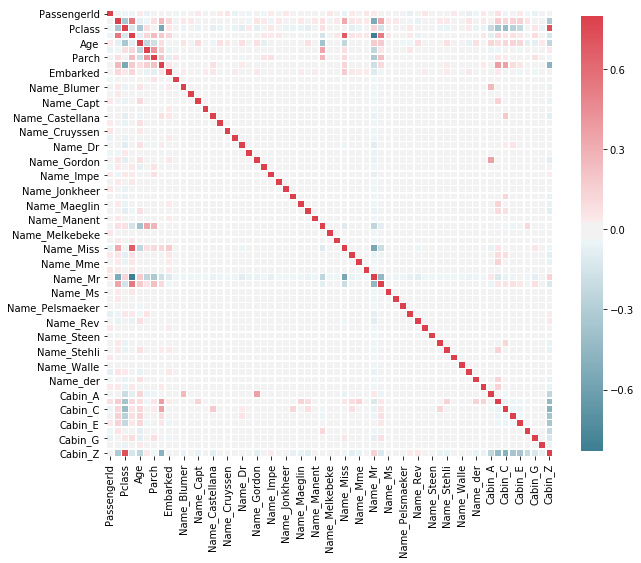

In [78]:
corr=titanic_dummies.corr()
corr

plt.figure(figsize=(10,10))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr, cmap=cmap, linewidths=.5, square=True, center=0, vmax=.8, cbar_kws={"shrink":.80})

In [79]:
dropSurvived=titanic_dummies.drop('Survived',axis=1) # 입력변수
label=titanic_dummies.Survived # 출력변수

dataTrain, dataTest, labelTrain, labelTest = train_test_split(dropSurvived, label, train_size=0.2, random_state=42)

In [80]:
dt2=tree.DecisionTreeClassifier(max_depth=2)
dt2.fit(dataTrain, labelTrain)
dt2_sc_train=dt2.score(dataTrain, labelTrain)
dt2_sc_test=dt2.score(dataTest, labelTest)

In [81]:
dtd=tree.DecisionTreeClassifier()
dtd.fit(dataTrain, labelTrain)
dt2_sc_train=dtd.score(dataTrain, labelTrain)
dt2_sc_test=dtd.score(dataTest, labelTest)
depth_num=dtd.get_depth()

In [82]:
depth=[3,4,5,6,10,0]
highest_test=0
highest_depth=0
highest_test_training=0
for i in range(13):
    if i==0:
        dt2=tree.DecisionTreeClassifier()
    else : dt2=tree.DecisionTreeClassifier(max_depth=i)
    dt2.fit(dataTrain, labelTrain)
    dt2_sc_train=dt2.score(dataTrain, labelTrain)
    dt2_sc_test=dt2.score(dataTest, labelTest)

    if dt2_sc_test>=highest_test:
        highest_test=dt2_sc_test
        highest_test_training=dt2_sc_train
        highest_depth=i
    
print("Highest test score : {}\nthen Training score : {}\ndepth : {}".format(highest_test, highest_test_training,highest_depth))

Highest test score : 0.7812061711079944
then Training score : 0.8258426966292135
depth : 2


In [84]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [85]:
titanic_dummies

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Billiard,...,Name_the,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Z
0,1,0,3,1,22.0,1,0,7.2500,1.0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,2,38.0,1,0,71.2833,2.0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,1,3,2,26.0,0,0,7.9250,1.0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,2,35.0,1,0,53.1000,1.0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0,3,1,35.0,0,0,8.0500,1.0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,1.0,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,2,19.0,0,0,30.0000,1.0,0,...,0,0,1,0,0,0,0,0,0,0
888,889,0,3,2,29.0,1,2,23.4500,1.0,0,...,0,0,0,0,0,0,0,0,0,1
889,890,1,1,1,26.0,0,0,30.0000,2.0,0,...,0,0,0,1,0,0,0,0,0,0


In [86]:
yt=np.array(titanic_dummies['Survived'])
xt=titanic_dummies.drop(['Survived'], axis=1)
xt=np.array(xt)

In [95]:
yt=titanic_dummies['Survived']
xt=titanic_dummies.drop(['Survived'], axis=1)

In [96]:
scaler=MinMaxScaler()
xt=scaler.fit_transform(xt)

In [97]:
xt

array([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.0011236 , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00224719, 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.99775281, 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.9988764 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [98]:
xtrain, xtest, ytrain, ytest=train_test_split(xt, yt, test_size=0.2, random_state=42)

In [99]:
xtrain.shape
print("shape of x train : " + str(xtrain.shape))

shape of x train : (712, 60)


In [100]:
for thisC in [1,3,5,10,40,60,80,100]:
    svc=SVC(kernel='linear', C=thisC)
    model=svc.fit(xtrain, ytrain)
    scoreTrain=model.score(xtrain, ytrain)
    scoreTest=model.score(xtest, ytest)
    print("선형 SVM : C:{}, training score : {:2f}, test score : {:2f}\n".format(thisC, scoreTrain, scoreTest))

선형 SVM : C:1, training score : 0.849719, test score : 0.821229

선형 SVM : C:3, training score : 0.849719, test score : 0.821229

선형 SVM : C:5, training score : 0.849719, test score : 0.815642

선형 SVM : C:10, training score : 0.849719, test score : 0.815642

선형 SVM : C:40, training score : 0.849719, test score : 0.821229

선형 SVM : C:60, training score : 0.849719, test score : 0.821229

선형 SVM : C:80, training score : 0.849719, test score : 0.821229

선형 SVM : C:100, training score : 0.849719, test score : 0.821229



In [101]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
model=SVC(kernel='linear', C=20).fit(xtrain, ytrain)
scores=cross_val_score(model, xtrain, ytrain, cv=5) # cv=5 -> 5 fold
print("CV 점수 : "+ str(scores))
st_scores=cross_val_score(model, xtrain, ytrain, cv=StratifiedKFold(5, random_state=10, shuffle=True))
print("StratifiedKFold CV 점수 : "+str(st_scores))
print("CV 평균 점수 : " + str(scores.mean()))
print("StratifiedKFold CV 평균 점수 : "+str(st_scores.mean()))

CV 점수 : [0.82517483 0.82517483 0.82517483 0.8028169  0.83687943]
StratifiedKFold CV 점수 : [0.82517483 0.77622378 0.83216783 0.8028169  0.84397163]
CV 평균 점수 : 0.823044161911408
StratifiedKFold CV 평균 점수 : 0.8160709932361115


In [103]:
from sklearn.svm import LinearSVC
for thisC in [1,3,5,10,40,60,80,100]:
    model2=LinearSVC(C=thisC).fit(xtrain, ytrain)
    scoretrain=model2.score(xtrain, ytrain)
    scoretest=model2.score(xtest, ytest)
    print("선형 SVM : C:{}, training score : {:2f}, test score : {:2f}\n".format(thisC, scoretrain, scoretest))

선형 SVM : C:1, training score : 0.853933, test score : 0.821229

선형 SVM : C:3, training score : 0.853933, test score : 0.810056

선형 SVM : C:5, training score : 0.853933, test score : 0.810056

선형 SVM : C:10, training score : 0.852528, test score : 0.810056

선형 SVM : C:40, training score : 0.848315, test score : 0.804469

선형 SVM : C:60, training score : 0.848315, test score : 0.798883

선형 SVM : C:80, training score : 0.844101, test score : 0.793296

선형 SVM : C:100, training score : 0.817416, test score : 0.793296



C:\Users\student\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

In [104]:
# RBF 커널 SVM, C와 gamma par 사용
for thisGamma in [.1, .25, .5, 1]:
    for thisC in [1,5,10,20,40,100]:
        model3=SVC(kernel='rbf', C=thisC, gamma=thisGamma).fit(xtrain, ytrain)
        m3train=model3.score(xtrain, ytrain)
        m3test=model3.score(xtest, ytest)
        print("RBF SVM : C : {}, Gamma : {}, training score : {:2f}, test score : {:2f}\n".format(thisC, thisGamma,
                                                                                                  m3train, m3test))

RBF SVM : C : 1, Gamma : 0.1, training score : 0.813202, test score : 0.793296

RBF SVM : C : 5, Gamma : 0.1, training score : 0.860955, test score : 0.821229

RBF SVM : C : 10, Gamma : 0.1, training score : 0.866573, test score : 0.815642

RBF SVM : C : 20, Gamma : 0.1, training score : 0.872191, test score : 0.810056

RBF SVM : C : 40, Gamma : 0.1, training score : 0.875000, test score : 0.810056

RBF SVM : C : 100, Gamma : 0.1, training score : 0.877809, test score : 0.821229

RBF SVM : C : 1, Gamma : 0.25, training score : 0.852528, test score : 0.804469

RBF SVM : C : 5, Gamma : 0.25, training score : 0.873596, test score : 0.804469

RBF SVM : C : 10, Gamma : 0.25, training score : 0.876404, test score : 0.804469

RBF SVM : C : 20, Gamma : 0.25, training score : 0.877809, test score : 0.815642

RBF SVM : C : 40, Gamma : 0.25, training score : 0.882022, test score : 0.815642

RBF SVM : C : 100, Gamma : 0.25, training score : 0.891854, test score : 0.826816

RBF SVM : C : 1, Gamma :

In [105]:
from sklearn.model_selection import GridSearchCV
param={'C':[1,5,10,20,40,100], 'gamma':[.1, .25, .5, 1]}
GS=GridSearchCV(SVC(kernel='rbf'), param, cv=5)
GS.fit(xtrain, ytrain)
print(GS.best_params_)
print(GS.best_score_)

{'C': 20, 'gamma': 0.25}
0.8384831460674157


In [ ]:
test=pd.read_csv('test.csv')

In [ ]:
yt=titanic_dummies['Survived']
xt=titanic_dummies.drop(['Survived'], axis=1)

In [ ]:
scaler=MinMaxScaler()
xt=scaler.fit_transform(xt)